In [7]:
# Cell 1: Define and Load the Pre-trained GAN Generator Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
import numpy as np

# Define the generator model architecture for GAN
def build_generator(latent_dim):
    """
    Build the generator model structure for GAN.
    """
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(4))  # Output layer for 4 GAN-generated features
    return model

# Latent dimension for GAN generator
latent_dim = 100
generator = build_generator(latent_dim)

# Placeholder for pre-trained weights of the generator model
# Replace `pretrained_weights` with actual extracted weights
pretrained_weights = None  # Placeholder for weights

# Load pre-trained weights into the generator (if available)
if pretrained_weights:
    generator.set_weights(pretrained_weights)
    print("Pre-trained weights loaded into the generator.")
else:
    print("No pre-trained weights provided. Ensure to load them before generating data.")


No pre-trained weights provided. Ensure to load them before generating data.


In [11]:
# Cell 2: Generate and Save Rescaled Synthetic Data for GAN Columns

# Function to rescale GAN-generated data to observed ranges
def rescale_to_range(data, min_val, max_val):
    """
    Rescale GAN-generated data to a specific range.
    Parameters:
    - data: GAN-generated data to rescale.
    - min_val: Minimum value of the desired range.
    - max_val: Maximum value of the desired range.
    Returns:
    - Rescaled data.
    """
    data_min, data_max = data.min(), data.max()
    return (data - data_min) / (data_max - data_min) * (max_val - min_val) + min_val

# Generate synthetic data for GAN-based columns
num_samples = 12176  # Match the dataset size
synthetic_data_gan = generate_synthetic_data(generator, num_samples, latent_dim)

# Observed ranges for GAN columns
ranges = {
    'Synthetic_D_ORIXCOOR': (500, 600500),
    'Synthetic_D_ORIYCOOR': (500, 5131500),
    'Synthetic_D_DESTXCOOR': (500, 600500),
    'Synthetic_D_DESTYCOOR': (500, 5131500)
}

# Convert GAN-generated synthetic data to a DataFrame
gan_columns = ['Synthetic_D_ORIXCOOR', 'Synthetic_D_ORIYCOOR', 
               'Synthetic_D_DESTXCOOR', 'Synthetic_D_DESTYCOOR']
synthetic_df_gan = pd.DataFrame(synthetic_data_gan, columns=gan_columns)

# Rescale GAN-generated data to match observed ranges
for col in gan_columns:
    min_val, max_val = ranges[col]
    synthetic_df_gan[col] = rescale_to_range(synthetic_df_gan[col], min_val, max_val)

# Save the rescaled GAN-generated synthetic data to a CSV file
synthetic_df_gan.to_csv('synthetic_gan_data.csv', index=False)
print("Rescaled GAN-based synthetic data saved to 'synthetic_gan_data.csv'.")


381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Rescaled GAN-based synthetic data saved to 'synthetic_gan_data.csv'.


In [18]:
# Cell 3: Combine All Synthetic Data and Save to One CSV File

# Function to generate synthetic data using noise augmentation
def generate_noise_augmented_data(original_data, noise_factor=0.01):
    """
    Generate synthetic data using noise augmentation.
    Parameters:
    - original_data: Original numeric data to augment.
    - noise_factor: Multiplier for random noise added to the original data.
    Returns:
    - synthetic_data: Augmented data with noise added.
    """
    noise = noise_factor * np.random.normal(0, 1, original_data.shape)
    synthetic_data = original_data + noise
    return np.clip(synthetic_data, 0, None)  # Ensure values stay non-negative

# Generate synthetic data for noise-augmented columns
num_samples = 12176
# Simulate original data for noise augmentation
original_p_sexe = np.random.randint(1, 3, num_samples)  # Binary values shifted to 1 and 2
original_p_grage = np.random.randint(0, 100, num_samples)  # Example age range

# Refine `D_HREDE` generation to match source characteristics
original_d_hrede = np.random.uniform(0, 24, num_samples)  # Simulate continuous values between 0 and 24

# Apply noise augmentation
synthetic_p_sexe = np.rint(generate_noise_augmented_data(original_p_sexe.reshape(-1, 1))).astype(int).flatten()
synthetic_p_grage = np.rint(generate_noise_augmented_data(original_p_grage.reshape(-1, 1))).astype(int).flatten()
synthetic_d_hrede = generate_noise_augmented_data(original_d_hrede.reshape(-1, 1)).flatten()

# Combine noise-augmented data into a DataFrame
noise_augmented_columns = ['Synthetic_P_SEXE', 'Synthetic_P_GRAGE', 'Synthetic_D_HREDE']
synthetic_df_noise = pd.DataFrame({
    'Synthetic_P_SEXE': synthetic_p_sexe,
    'Synthetic_P_GRAGE': synthetic_p_grage,
    'Synthetic_D_HREDE': synthetic_d_hrede
})

# Load GAN-generated synthetic data (saved from the previous cell)
gan_columns = ['Synthetic_D_ORIXCOOR', 'Synthetic_D_ORIYCOOR', 
               'Synthetic_D_DESTXCOOR', 'Synthetic_D_DESTYCOOR']
synthetic_df_gan = pd.read_csv('synthetic_gan_data.csv')

# Combine GAN-based and noise-augmented data
combined_synthetic_data = pd.concat([synthetic_df_gan, synthetic_df_noise], axis=1)

# Save all synthetic data to a single CSV file
combined_synthetic_data.to_csv('combined_synthetic_data.csv', index=False)
print("All synthetic data saved to 'combined_synthetic_data.csv'.")



All synthetic data saved to 'combined_synthetic_data.csv'.


Frequency distribution plot saved as 'Synthetic_D_ORIXCOOR_frequency_distribution.png'.


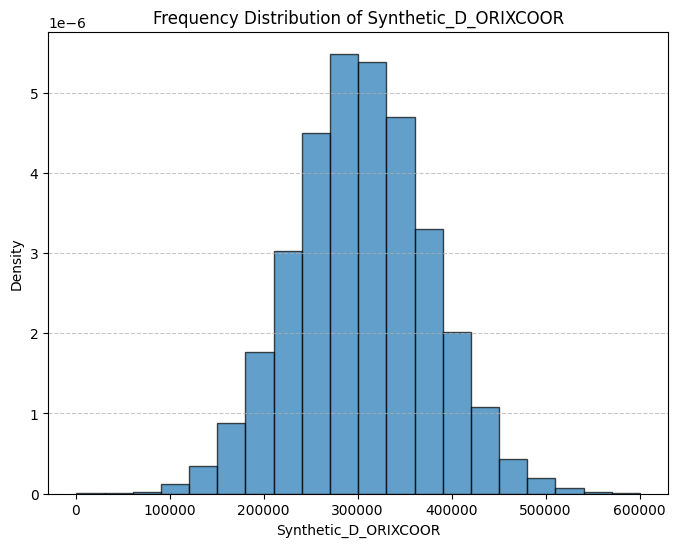

Frequency distribution plot saved as 'Synthetic_D_ORIYCOOR_frequency_distribution.png'.


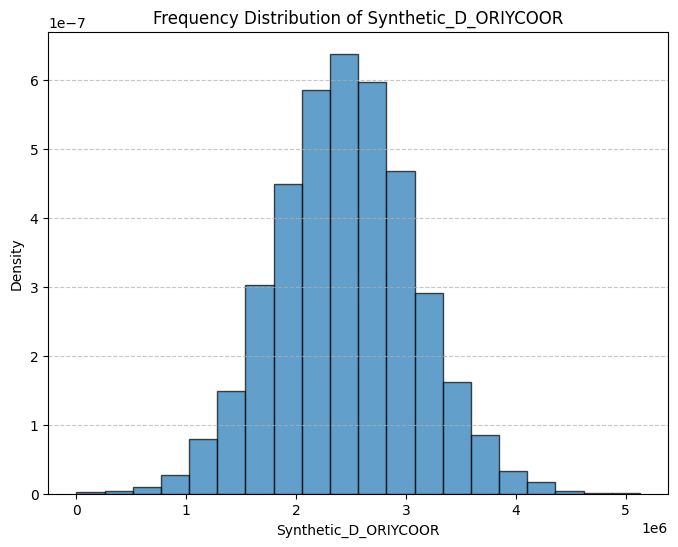

Frequency distribution plot saved as 'Synthetic_D_DESTXCOOR_frequency_distribution.png'.


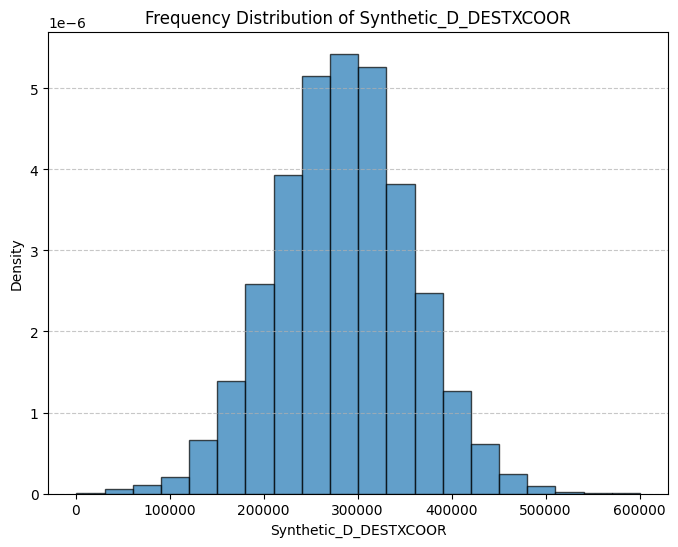

Frequency distribution plot saved as 'Synthetic_D_DESTYCOOR_frequency_distribution.png'.


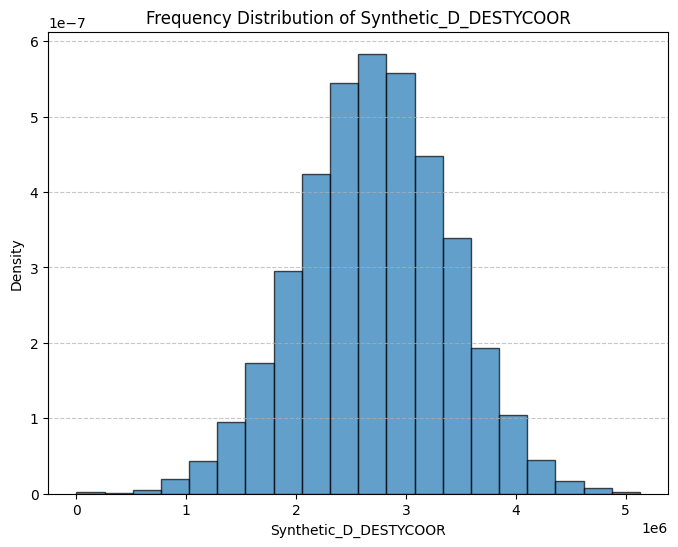

Frequency distribution plot saved as 'Synthetic_P_SEXE_frequency_distribution.png'.


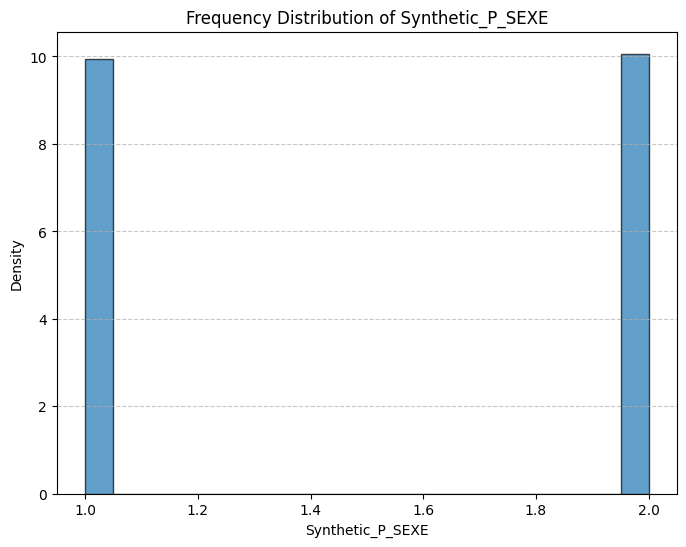

Frequency distribution plot saved as 'Synthetic_P_GRAGE_frequency_distribution.png'.


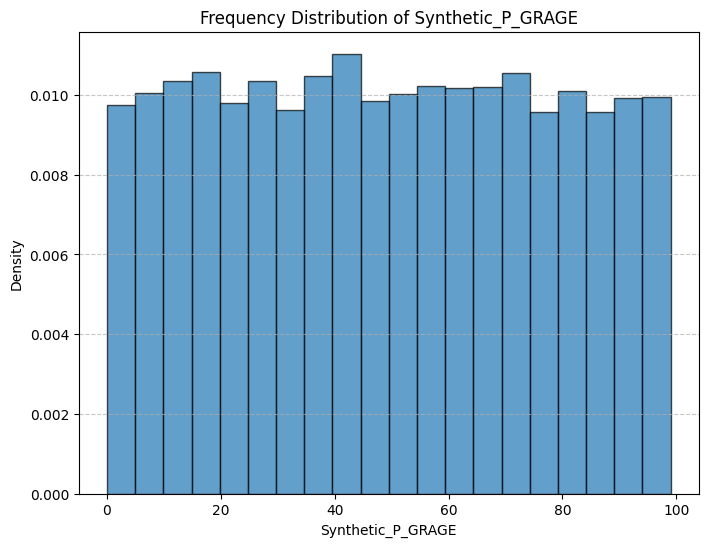

Frequency distribution plot saved as 'Synthetic_D_HREDE_frequency_distribution.png'.


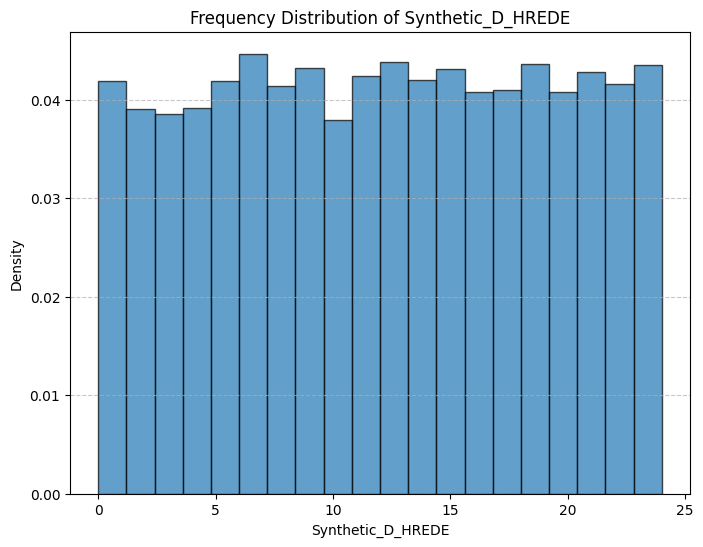

In [19]:
# Cell 4: Generate, Show, and Save Frequency Distribution Plots

import matplotlib.pyplot as plt

# Function to plot frequency distribution for a column
def plot_frequency_distribution(data, column_name):
    """
    Plot, display, and save the frequency distribution of a specified column.
    Parameters:
    - data: DataFrame containing the data.
    - column_name: Name of the column to plot.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(data[column_name], bins=20, density=True, alpha=0.7, edgecolor='black')
    plt.title(f'Frequency Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Save the plot
    plot_filename = f'{column_name}_frequency_distribution.png'
    plt.savefig(plot_filename)
    print(f"Frequency distribution plot saved as '{plot_filename}'.")
    
    # Show the plot
    plt.show()

# Load the combined synthetic data
combined_synthetic_data = pd.read_csv('combined_synthetic_data.csv')

# List of all columns to plot
all_columns = combined_synthetic_data.columns

# Generate, display, and save frequency distribution plots for all columns
for column in all_columns:
    plot_frequency_distribution(combined_synthetic_data, column)
